In [1]:
#import packages
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/u/yashjain/anaconda3/envs/vitessce-env/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#set base directory and point to downloaded Meta Kaggle csv files
base_directory = os.getcwd()
extension = 'csv'
os.chdir(base_directory)
meta_files = glob.glob('*.{}'.format(extension))
print(meta_files, len(meta_files))

['Datasets.csv', 'ForumMessages.csv', 'ForumMessageVotes.csv', 'ForumTopics.csv', 'Forums.csv', 'KernelVersionCompetitionSources.csv', 'Kernels.csv', 'TeamMemberships.csv', 'Teams.csv', 'Submissions.csv', 'Users.csv', 'Competitions.csv', 'source_data_fig2_subVSscores.csv', 'source_data_fig_2a.csv', 'source_data_fig_2a-teams.csv', 'source_data_fig_2a-messages.csv'] 16


In [4]:
#read in dfs and declare variables to select competition of interest
comps_df = pd.read_csv(base_directory+'/Competitions.csv', parse_dates=['DeadlineDate'])

### This is the line that is changed to select a competition ###
comp_title = "SenNet + HOA - Hacking the Human Vasculature in 3D"
comp_overview = comps_df[comps_df.Title==comp_title]
comp_id = comp_overview.iloc[0]['Id']
comp_forum_id = comp_overview.iloc[0]['ForumId']
comp_overview

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,ScoreTruncationNumDecimals,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
5678,61446,blood-vessel-segmentation,SenNet + HOA - Hacking the Human Vasculature i...,Segment vasculature in 3D scans of human kidney,Research,3859014,3873.0,11/07/2023 17:26:14,2024-02-06 23:59:00,01/30/2024 23:59:00,01/30/2024 23:59:00,02/29/2024 00:00:00,NaN,True,True,True,True,67,6,45372968,Surface Dice Metric,Surface Dice metric for 2D or 3D data.,True,5,2,5,False,True,USD,80000.0,5,1.0,True,1149,1401,32391,NaN,NaN,False,False,NaN,1


In [5]:
comp_forum_id

3859014

In [6]:
comp_overview.columns

Index(['Id', 'Slug', 'Title', 'Subtitle', 'HostSegmentTitle', 'ForumId',
       'OrganizationId', 'EnabledDate', 'DeadlineDate',
       'ProhibitNewEntrantsDeadlineDate', 'TeamMergerDeadlineDate',
       'TeamModelDeadlineDate', 'ModelSubmissionDeadlineDate',
       'FinalLeaderboardHasBeenVerified', 'HasKernels',
       'OnlyAllowKernelSubmissions', 'HasLeaderboard', 'LeaderboardPercentage',
       'ScoreTruncationNumDecimals', 'EvaluationAlgorithmAbbreviation',
       'EvaluationAlgorithmName', 'EvaluationAlgorithmDescription',
       'EvaluationAlgorithmIsMax', 'MaxDailySubmissions',
       'NumScoredSubmissions', 'MaxTeamSize', 'BanTeamMergers',
       'EnableTeamModels', 'RewardType', 'RewardQuantity', 'NumPrizes',
       'UserRankMultiplier', 'CanQualifyTiers', 'TotalTeams',
       'TotalCompetitors', 'TotalSubmissions', 'ValidationSetName',
       'ValidationSetValue', 'EnableSubmissionModelHashes',
       'EnableSubmissionModelAttachments', 'HostName', 'CompetitionTypeId'],
   

In [7]:
comp_overview[['EnabledDate', 'DeadlineDate', 'ProhibitNewEntrantsDeadlineDate',
       'TeamMergerDeadlineDate', 'TeamModelDeadlineDate',
       'ModelSubmissionDeadlineDate']]

,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate
5678,11/07/2023 17:26:14,2024-02-06 23:59:00,01/30/2024 23:59:00,01/30/2024 23:59:00,02/29/2024 00:00:00,NaN


In [8]:
#important dates for Kaggle 2
important_dates_df = pd.DataFrame(data={'event_title': ['Competition Start Date 11/07/2023','Team Merger Deadline 01/30/2024', 'Competition End Date 02/06/2024','Winner Announcement Date 02/08/2024'], 'date': [pd.to_datetime('11/07/2023'), pd.to_datetime('01/30/2024'), pd.to_datetime('02/06/2024'), pd.to_datetime('02/08/2024')]})
important_dates_df

,event_title,date
0,Competition Start Date 11/07/2023,2023-11-07
1,Team Merger Deadline 01/30/2024,2024-01-30
2,Competition End Date 02/06/2024,2024-02-06
3,Winner Announcement Date 02/08/2024,2024-02-08


In [9]:
# inspect basic competition info
total_teams = comp_overview.TotalTeams
total_subs = comp_overview.TotalSubmissions

comp_overview

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,ScoreTruncationNumDecimals,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
5678,61446,blood-vessel-segmentation,SenNet + HOA - Hacking the Human Vasculature i...,Segment vasculature in 3D scans of human kidney,Research,3859014,3873.0,11/07/2023 17:26:14,2024-02-06 23:59:00,01/30/2024 23:59:00,01/30/2024 23:59:00,02/29/2024 00:00:00,NaN,True,True,True,True,67,6,45372968,Surface Dice Metric,Surface Dice metric for 2D or 3D data.,True,5,2,5,False,True,USD,80000.0,5,1.0,True,1149,1401,32391,NaN,NaN,False,False,NaN,1


In [10]:
# find all teams for this competition
teams_df = pd.read_csv(base_directory+'/Teams.csv', infer_datetime_format=True)

comp_teams_df = teams_df[teams_df.CompetitionId==comp_id].dropna(subset=['LastSubmissionDate'])
comp_teams_df['TeamId'] = comp_teams_df['Id']
#comp_teams_df = teams_df[teams_df.CompetitionId==comp_id]
#comp_teams_df.head(5)
team_ids_list = comp_teams_df.Id.unique().tolist()
len(team_ids_list)


1150

In [11]:
comp_teams_df.head(10)

,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank,WriteUpForumTopicId,TeamId
6851999,11205901,61446,2917570.0,KSMCG90,NaN,01/05/2024,35762651.0,35762651.0,False,NaN,NaN,718.0,803.0,NaN,11205901
6852056,11205974,61446,2228534.0,Hiểu Vy,NaN,01/22/2024,35910366.0,35972335.0,False,NaN,NaN,469.0,352.0,NaN,11205974
6852276,11206255,61446,1670024.0,[Rist] KOF,NaN,02/05/2024,36294938.0,36286692.0,False,2.0,02/08/2024,19.0,44.0,NaN,11206255
6852493,11206545,61446,13373958.0,mhdaw,NaN,12/24/2023,35567279.0,35567279.0,False,NaN,NaN,1112.0,1120.0,NaN,11206545
6852915,11207209,61446,6280504.0,Seydi faye,NaN,12/24/2023,34989144.0,35568142.0,False,NaN,NaN,965.0,903.0,NaN,11207209
6852972,11207296,61446,2133525.0,AndNov,NaN,01/29/2024,36191095.0,36191095.0,False,NaN,NaN,329.0,498.0,NaN,11207296
6853013,11207365,61446,7225401.0,kglctf,NaN,02/06/2024,36277874.0,36277874.0,False,NaN,NaN,102.0,659.0,NaN,11207365
6853034,11207392,61446,282250.0,tereka,NaN,01/18/2024,35686873.0,35686873.0,False,1.0,02/08/2024,662.0,9.0,475080.0,11207392
6853046,11207415,61446,3964695.0,MaxChen303,NaN,02/06/2024,36299859.0,36301142.0,False,2.0,02/08/2024,21.0,48.0,NaN,11207415
6853051,11207423,61446,4945934.0,David Roberts,NaN,01/13/2024,35910001.0,35923261.0,False,NaN,NaN,765.0,149.0,NaN,11207423


In [12]:
#create df of submissions that are part of the competition
submissions_df = pd.read_csv(base_directory+'/Submissions.csv', infer_datetime_format=True)
bool_sub_by_team_in_comp = submissions_df.TeamId.isin(team_ids_list)
subs_in_comp_df = submissions_df[bool_sub_by_team_in_comp]

#filter out those after deadline
subs_in_comp_df = subs_in_comp_df[subs_in_comp_df.IsAfterDeadline==False]
subs_in_comp_df.head(5)

,Id,SubmittedUserId,TeamId,SourceKernelVersionId,SubmissionDate,ScoreDate,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
13330517,34824672,9240143.0,11208527,151877948.0,11/22/2023,11/22/2023,False,0.0,0.0,0.0,0.0
13330518,34673975,9240143.0,11208527,151007289.0,11/16/2023,11/16/2023,False,0.0,0.0,0.0,0.0
13330519,34638005,9240143.0,11208527,150746669.0,11/15/2023,11/15/2023,False,0.0,0.0,0.0,0.0
13330520,34833580,9240143.0,11208527,151920526.0,11/23/2023,11/23/2023,False,0.0,0.0,0.0,0.0
13330521,34616893,9240143.0,11208527,150604837.0,11/14/2023,11/14/2023,False,0.0,0.0,0.0,0.0


In [13]:
c = pd.read_csv(base_directory+'/TeamMemberships.csv', infer_datetime_format=True).dropna(subset=['RequestDate'])
c.head(2)

,Id,TeamId,UserId,RequestDate
22,497916,469024,200660,02/06/2017
23,524121,494689,777876,02/20/2017


In [14]:
#plot number of teams over time

#get RequestDate by TeamId from TeamMemberships.csv
team_memberships_df = pd.read_csv(base_directory+'/TeamMemberships.csv', infer_datetime_format=True).dropna(subset=['RequestDate'])
team_memberships_df['RequestDate'] = pd.to_datetime(team_memberships_df.RequestDate)
bool_team_mem_in_comp = team_memberships_df.TeamId.isin(team_ids_list)
team_mem_in_comp = team_memberships_df[bool_team_mem_in_comp].set_index('TeamId').drop(columns=['Id', 'UserId']).sort_values(by='RequestDate')
team_mem_in_comp['TeamNum'] = range(1, len(team_mem_in_comp)+1)
team_mem_by_date = team_mem_in_comp.groupby('RequestDate')
teams_so_far_by_date_df = team_mem_by_date.max()
teams_so_far_by_date_df.head(10)
#dates = list(team_mem_by_date.groups.keys())
#dates

,TeamNum
RequestDate,
2023-11-07,11
2023-11-08,56
2023-11-09,88
2023-11-10,126
2023-11-11,147
2023-11-12,160
2023-11-13,184
2023-11-14,208
2023-11-15,220


In [15]:
#add in reduced teams after team merger
#ended at 1149 teams
teams_after_drop_df = pd.DataFrame(data={'RequestDate': [pd.to_datetime('01/31/2024'), pd.to_datetime('02/01/2024'), pd.to_datetime('02/02/2024'), pd.to_datetime('02/03/2024'), pd.to_datetime('02/04/2024'), pd.to_datetime('02/05/2024'), pd.to_datetime('02/06/2024')], 'TeamNum': [1149, 1149, 1149, 1149, 1149, 1149, 1149]})

teams_so_far_by_date_df.columns = [''.join(col) for col in teams_so_far_by_date_df.columns.values]
teams_so_far_by_date_df = teams_so_far_by_date_df.reset_index()
teams_so_far_by_date_df.sort_values(by=['RequestDate'])
# teams_so_far_by_date_df = teams_so_far_by_date_df.append(teams_after_drop_df, ignore_index=True)
teams_so_far_by_date_df = pd.concat([teams_so_far_by_date_df, teams_after_drop_df], ignore_index=True)

teams_so_far_by_date_df.head(10)

,RequestDate,TeamNum
0,2023-11-07,11
1,2023-11-08,56
2,2023-11-09,88
3,2023-11-10,126
4,2023-11-11,147
5,2023-11-12,160
6,2023-11-13,184
7,2023-11-14,208
8,2023-11-15,220
9,2023-11-16,235


In [16]:
subs_in_comp_df.head(10)

,Id,SubmittedUserId,TeamId,SourceKernelVersionId,SubmissionDate,ScoreDate,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
13330517,34824672,9240143.0,11208527,151877948.0,11/22/2023,11/22/2023,False,0.0,0.0,0.0,0.0
13330518,34673975,9240143.0,11208527,151007289.0,11/16/2023,11/16/2023,False,0.0,0.0,0.0,0.0
13330519,34638005,9240143.0,11208527,150746669.0,11/15/2023,11/15/2023,False,0.0,0.0,0.0,0.0
13330520,34833580,9240143.0,11208527,151920526.0,11/23/2023,11/23/2023,False,0.0,0.0,0.0,0.0
13330521,34616893,9240143.0,11208527,150604837.0,11/14/2023,11/14/2023,False,0.0,0.0,0.0,0.0
13330522,34616461,9240143.0,11208527,150602080.0,11/14/2023,11/14/2023,False,NaN,NaN,NaN,NaN
13330523,34796970,9240143.0,11208527,151686847.0,11/21/2023,11/21/2023,False,0.0,0.0,0.0,0.0
13330524,34695352,9240143.0,11208527,151144814.0,11/17/2023,11/17/2023,False,NaN,NaN,NaN,NaN
13330525,34694953,9240143.0,11208527,151141773.0,11/17/2023,11/17/2023,False,NaN,NaN,NaN,NaN
13330526,34694914,9240143.0,11208527,151141488.0,11/17/2023,11/17/2023,False,NaN,NaN,NaN,NaN


In [17]:
#plot top scores over time
subs_in_comp_df["SubmissionDate"] = pd.to_datetime(subs_in_comp_df["SubmissionDate"], format="%m/%d/%Y")
subs_in_comp_df = subs_in_comp_df.sort_values(by='SubmissionDate')

#aggregate subs_in_comp_df by SubmissionDate
subs_in_comp_df = subs_in_comp_df.groupby('SubmissionDate')

x = pd.to_datetime(list(subs_in_comp_df.groups.keys()), format="%m/%d/%Y")
y_public = subs_in_comp_df.max('PublicScoreFullPrecision')
y_private = subs_in_comp_df.max('PrivateScoreFullPrecision')


In [18]:
y_public.head(5)

,Id,SubmittedUserId,TeamId,SourceKernelVersionId,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
SubmissionDate,,,,,,,,,
2023-11-08,34514095,14435659.0,11208769,149917617.0,False,0.007650,0.007650,0.020481,0.020481
2023-11-09,34535646,16563617.0,11220218,150068981.0,False,0.000000,0.000000,0.004217,0.004218
2023-11-10,34553797,16563617.0,11225304,150192914.0,False,0.000000,0.000000,0.004217,0.004218
2023-11-11,34572928,13134458.0,11226261,150320424.0,False,0.007964,0.007965,0.020111,0.020111
2023-11-12,34593192,17448638.0,11232545,150448917.0,False,0.095209,0.095210,0.199635,0.199636


In [19]:
y_private.head(5)

,Id,SubmittedUserId,TeamId,SourceKernelVersionId,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
SubmissionDate,,,,,,,,,
2023-11-08,34514095,14435659.0,11208769,149917617.0,False,0.007650,0.007650,0.020481,0.020481
2023-11-09,34535646,16563617.0,11220218,150068981.0,False,0.000000,0.000000,0.004217,0.004218
2023-11-10,34553797,16563617.0,11225304,150192914.0,False,0.000000,0.000000,0.004217,0.004218
2023-11-11,34572928,13134458.0,11226261,150320424.0,False,0.007964,0.007965,0.020111,0.020111
2023-11-12,34593192,17448638.0,11232545,150448917.0,False,0.095209,0.095210,0.199635,0.199636


In [20]:
x

DatetimeIndex(['2023-11-08', '2023-11-09', '2023-11-10', '2023-11-11',
               '2023-11-12', '2023-11-13', '2023-11-14', '2023-11-15',
               '2023-11-16', '2023-11-17', '2023-11-18', '2023-11-19',
               '2023-11-20', '2023-11-21', '2023-11-22', '2023-11-23',
               '2023-11-24', '2023-11-25', '2023-11-26', '2023-11-27',
               '2023-11-28', '2023-11-29', '2023-11-30', '2023-12-01',
               '2023-12-02', '2023-12-03', '2023-12-04', '2023-12-05',
               '2023-12-06', '2023-12-07', '2023-12-08', '2023-12-09',
               '2023-12-10', '2023-12-11', '2023-12-12', '2023-12-13',
               '2023-12-14', '2023-12-15', '2023-12-16', '2023-12-17',
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31', '2024-01-01', '2024-01-02',
      

In [21]:
# need to add number of messages over time to plot of teams over time
forums_df = pd.read_csv(base_directory+'/Forums.csv', infer_datetime_format=True)
forums_topics_df = pd.read_csv(base_directory+'/ForumTopics.csv', infer_datetime_format=True)
forums_messages_df = pd.read_csv(base_directory+'/ForumMessages.csv', infer_datetime_format=True)
forums_df.head()

,Id,ParentForumId,Title
0,991859,1023.0,regression
1,991813,1023.0,resnet_103000
2,991810,1023.0,ISLBISINDO1
3,40,8.0,ICDAR 2011 - Arabic Writer Identification
4,34,8.0,Deloitte/FIDE Chess Rating Challenge


In [22]:
comp_forums_df = forums_df[forums_df.Id==comp_forum_id]
comp_forums_topics_df = forums_topics_df[forums_topics_df.ForumId==comp_forum_id]



In [23]:
#have to filter by forum topic
topic_ids = list(comp_forums_topics_df.Id.unique())
#topic_ids

In [24]:
comp_forums_messages_df = forums_messages_df[forums_messages_df.ForumTopicId.isin(topic_ids)].set_index('Id').drop(columns=['ForumTopicId', 'PostUserId', 'ReplyToForumMessageId', 'Message', 'Medal', 'MedalAwardDate']).sort_values(by='PostDate')
comp_forums_messages_df.head(5)



,PostDate,RawMarkdown
Id,,
2581682,01/01/2024 02:36:11,"In my experience, it is really helpful to chec..."
2581910,01/01/2024 08:10:06,How do you guys cope up with leaderboard being...
2581919,01/01/2024 08:23:41,The best thing to do is see what can be learne...
2582096,01/01/2024 11:07:04,"hi, I'm trying out the OneCycleLR where I init..."
2582099,01/01/2024 11:16:18,We've fallen from silver to no medal in a peri...


In [25]:

comp_forums_messages_df['PostDate'] = pd.to_datetime(comp_forums_messages_df.PostDate)
comp_forums_messages_df = comp_forums_messages_df.sort_values(by=['PostDate'])
comp_forums_messages_df['MessageNum'] = range(1, len(comp_forums_messages_df)+1)
num_messages_by_date = comp_forums_messages_df.groupby('PostDate')
num_messages_by_date_df = num_messages_by_date.max().reset_index()
num_messages_by_date_df['PostDate'] = pd.to_datetime(num_messages_by_date_df.PostDate).dt.date
num_messages_by_date_df.head(5)

,PostDate,RawMarkdown,MessageNum
0,2023-11-03,We would like to welcome the Kaggle community ...,1
1,2023-11-07,Super exciting to see this 4th Kaggle competit...,2
2,2023-11-07,"In addition to this competition forum, you can...",3
3,2023-11-07,# 1. [HuBMAP - Hacking the Kidney (2021)](http...,4
4,2023-11-07,"Hello all,\n\nWish you all the best for the ch...",5


In [26]:
# y is PostDate
# x is cumulative number of messages
message_x = num_messages_by_date_df['MessageNum']
message_y = num_messages_by_date_df.PostDate


In [27]:
message_y.tail(10)

1589    2024-02-28
1590    2024-02-29
1591    2024-03-01
1592    2024-03-02
1593    2024-03-02
1594    2024-03-02
1595    2024-03-31
1596    2024-04-11
1597    2024-05-05
1598    2024-06-16
Name: PostDate, dtype: object

In [28]:
message_x.tail(10)

1589    1590
1590    1591
1591    1592
1592    1593
1593    1594
1594    1595
1595    1596
1596    1597
1597    1598
1598    1599
Name: MessageNum, dtype: int64

In [29]:
import datetime
fdfnm = num_messages_by_date_df[num_messages_by_date_df['PostDate'] <= datetime.date(2024,2,15)]
# drop first row and reset index
fdfnm = fdfnm.iloc[1:].reset_index(drop=True)

message_x = fdfnm['MessageNum']
message_y = fdfnm.PostDate


In [30]:
message_y.head(5)

0    2023-11-07
1    2023-11-07
2    2023-11-07
3    2023-11-07
4    2023-11-07
Name: PostDate, dtype: object

In [31]:
message_x.head(5)

0    2
1    3
2    4
3    5
4    6
Name: MessageNum, dtype: int64

In [32]:
message_y.tail(5)

1576    2024-02-13
1577    2024-02-13
1578    2024-02-13
1579    2024-02-14
1580    2024-02-15
Name: PostDate, dtype: object

In [33]:
message_x.tail(5)

1576    1578
1577    1579
1578    1580
1579    1581
1580    1582
Name: MessageNum, dtype: int64

In [34]:
message_x.shape[0]

1581

In [35]:
important_dates_df

,event_title,date
0,Competition Start Date 11/07/2023,2023-11-07
1,Team Merger Deadline 01/30/2024,2024-01-30
2,Competition End Date 02/06/2024,2024-02-06
3,Winner Announcement Date 02/08/2024,2024-02-08


In [36]:
type(x)

# convert list of dates into datetime (date only) and sort them.
date_list = list(subs_in_comp_df.groups.keys())

# add date 2023-11-07 to the beginning of the list
date_list.insert(0, '2023-11-07')

date_list = pd.to_datetime(date_list).sort_values()
date_list

DatetimeIndex(['2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
               '2023-11-11', '2023-11-12', '2023-11-13', '2023-11-14',
               '2023-11-15', '2023-11-16', '2023-11-17', '2023-11-18',
               '2023-11-19', '2023-11-20', '2023-11-21', '2023-11-22',
               '2023-11-23', '2023-11-24', '2023-11-25', '2023-11-26',
               '2023-11-27', '2023-11-28', '2023-11-29', '2023-11-30',
               '2023-12-01', '2023-12-02', '2023-12-03', '2023-12-04',
               '2023-12-05', '2023-12-06', '2023-12-07', '2023-12-08',
               '2023-12-09', '2023-12-10', '2023-12-11', '2023-12-12',
               '2023-12-13', '2023-12-14', '2023-12-15', '2023-12-16',
               '2023-12-17', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30', '2023-12-31', '2024-01-01',
      

In [37]:
message_y.head(5)

0    2023-11-07
1    2023-11-07
2    2023-11-07
3    2023-11-07
4    2023-11-07
Name: PostDate, dtype: object

In [38]:
# number of rows in y_public
y_public.head(5)

,Id,SubmittedUserId,TeamId,SourceKernelVersionId,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
SubmissionDate,,,,,,,,,
2023-11-08,34514095,14435659.0,11208769,149917617.0,False,0.007650,0.007650,0.020481,0.020481
2023-11-09,34535646,16563617.0,11220218,150068981.0,False,0.000000,0.000000,0.004217,0.004218
2023-11-10,34553797,16563617.0,11225304,150192914.0,False,0.000000,0.000000,0.004217,0.004218
2023-11-11,34572928,13134458.0,11226261,150320424.0,False,0.007964,0.007965,0.020111,0.020111
2023-11-12,34593192,17448638.0,11232545,150448917.0,False,0.095209,0.095210,0.199635,0.199636


In [39]:
len(date_list)

92

In [40]:
message_x.shape

(1581,)

In [41]:
message_y.shape

(1581,)

In [42]:
df_to_plot = pd.DataFrame()
df_to_plot["NumTeams"] = teams_so_far_by_date_df.TeamNum
df_to_plot["NumTeamsDate"] = teams_so_far_by_date_df.RequestDate
# Add a 0 value to the beginning of the list to make the lengths match. No submissions on first day of competition. 
y_public_list = list(y_public['PublicScoreLeaderboardDisplay'])
y_public_list.insert(0, 0)
df_to_plot["PublicScoreLeaderboard"] = y_public_list
y_private_list = list(y_private['PrivateScoreLeaderboardDisplay'])
y_private_list.insert(0, 0)
df_to_plot["PrivateScoreLeaderboard"] = y_private_list
df_to_plot["SubmissionDate"] = date_list
df_to_plot.to_csv("source_data_fig_2a-teams.csv", index=False)

df_to_plot_messages = pd.DataFrame()
df_to_plot_messages["NumMessages"] = message_x
df_to_plot_messages["MessageDate"] = message_y
df_to_plot_messages.to_csv("source_data_fig_2a-messages.csv", index=False)


In [43]:

df_to_plot_v2 = pd.read_csv('source_data_fig_2a-teams.csv')
df_to_plot_v2_messages = pd.read_csv('source_data_fig_2a-messages.csv')
df_to_plot_v2.head(5)

,NumTeams,NumTeamsDate,PublicScoreLeaderboard,PrivateScoreLeaderboard,SubmissionDate
0,11,2023-11-07,0.000000,0.000000,2023-11-07
1,56,2023-11-08,0.007650,0.020481,2023-11-08
2,88,2023-11-09,0.000000,0.004217,2023-11-09
3,126,2023-11-10,0.000000,0.004217,2023-11-10
4,147,2023-11-11,0.007964,0.020111,2023-11-11


In [44]:
df_to_plot_v2_messages.head(5)

,NumMessages,MessageDate
0,2,2023-11-07
1,3,2023-11-07
2,4,2023-11-07
3,5,2023-11-07
4,6,2023-11-07


In [45]:
df_to_plot_v2.shape

(92, 5)

In [46]:
df_to_plot_v2_messages.shape

(1581, 2)

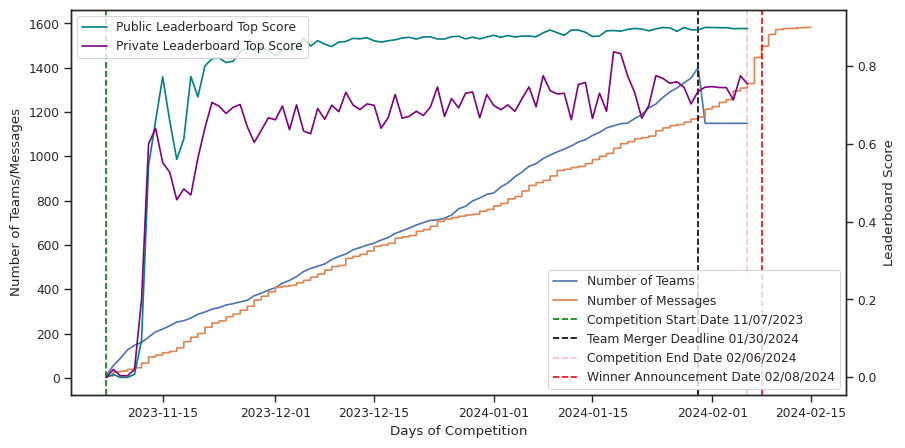

In [49]:
#plot Teams over Time
df_to_plot_v2["SubmissionDate"] = pd.to_datetime(df_to_plot_v2["SubmissionDate"], yearfirst=True)
df_to_plot_v2_messages["MessageDate"] = pd.to_datetime(df_to_plot_v2_messages["MessageDate"], yearfirst=True)
df_to_plot_v2["NumTeamsDate"] = pd.to_datetime(df_to_plot_v2["NumTeamsDate"], yearfirst=True)


# Creating figure
fig = plt.figure(figsize=(10,5))
# Plotting dataset_2
ax = fig.add_subplot(111)
sns.set_style("ticks")
#plt.figure(figsize=(10, 3))
ax.plot(df_to_plot_v2["NumTeamsDate"], df_to_plot_v2["NumTeams"], label="Number of Teams")
ax.plot(df_to_plot_v2_messages["MessageDate"], df_to_plot_v2_messages["NumMessages"], label="Number of Messages")
#plt.plot(x, list(y_public['PublicScoreLeaderboardDisplay']), label="Public Leaderboard Top Score", color='purple')
#plt.plot(x, list(y_private['PrivateScoreLeaderboardDisplay']), label="Private Leaderboard Top Score", color='brown')
# Creating Twin axes for dataset_1
ax2 = ax.twinx()
#ax2.plot(x, dataset_1, '-r', label='dataset_1')
ax2.plot(df_to_plot_v2["SubmissionDate"], list(df_to_plot_v2["PublicScoreLeaderboard"]), label="Public Leaderboard Top Score",color = 'teal')
ax2.plot(df_to_plot_v2["SubmissionDate"], list(df_to_plot_v2["PrivateScoreLeaderboard"]), label="Private Leaderboard Top Score",color = 'purple')

#plt.title("Number of Teams and Messages over Time")
ax.set_xlabel("Days of Competition")
ax.set_ylabel("Number of Teams/Messages")
ax2.set_ylabel("Leaderboard Score")


# add vertical lines for critical dates
ax.axvline(x=important_dates_df.iloc[0]['date'], color='green', label=important_dates_df.iloc[0]['event_title'], linestyle='--')
ax.axvline(x=important_dates_df.iloc[1]['date'], color='black', label=important_dates_df.iloc[1]['event_title'], linestyle='--')
ax.axvline(x=important_dates_df.iloc[2]['date'], color='pink', label=important_dates_df.iloc[2]['event_title'], linestyle='--')
ax.axvline(x=important_dates_df.iloc[3]['date'], color='red', label=important_dates_df.iloc[3]['event_title'], linestyle='--')
#plt.axvline(x=important_dates_df.iloc[2]['date'], color='red', label=important_dates_df.iloc[2]['event_title'], linestyle='--')
#plt.draw()
#plt.subplots_adjust(bottom=0.15)#adjusts plot so x label isn't cut off

ax.legend(loc=4)
ax2.legend(loc=2)
#plt.legend()

plt.savefig('timeline-plot.png', dpi=1200)
plt.savefig('timeline-plot.svg', dpi=1200)

plt.show()